In [1]:
# Import
import numpy as np
from plot import plot, plot_modes_residual
from tfa_svmd import *
from tfa import get_rfftm

In [2]:
# Define signal
sr, du, du_extend = 5000, 1.0, 0.2
y = np.load('signal 1 extended.npy')
t = np.arange(int(sr*(du+2*du_extend)))/sr - du_extend

In [3]:
# Set parameters
out_thr, in_thr = 1e-5, 1e-10
out_iter_max, in_iter_max = 3, 150
alpha, beta = 1, 1e-2
merge_range = 1.5
return_type = 'modes, residual'

In [4]:
# Decompose
y_rfft = get_rfftm(y)
Modes, res = svmd(y, out_thr, in_thr, out_iter_max, in_iter_max, alpha, beta, return_type)
#Modes, res = svmd_refined(y, out_thr, in_thr, out_iter_max, in_iter_max, alpha, beta, merge_range, return_type)
res_rfft = get_rfftm(res)

SVMD started. 

Input information:
y.size = 7000
The input is padded 1 zero at the end because its size is even.
input_size_is_odd = False 

Decomposition information:
z.size = 3501 

The 1th outer iteration took 10 inner iterations.
mode 1: f0 = 0, fc = 0.37 

The 2th outer iteration took 7 inner iterations.
mode 2: f0 = 140, fc = 140.07 

The 3th outer iteration took 18 inner iterations.
mode 3: f0 = 69, fc = 61.26 

Totally 3 modes extracted (excluding residual).
The last element of output is deleted because input size is even. 

SVMD completed, running time: 0.0105 seconds.


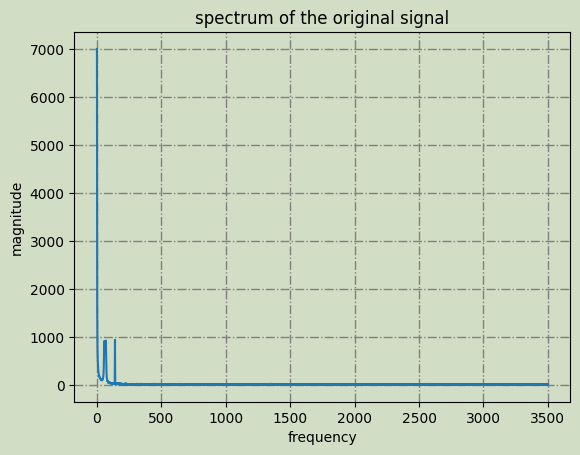

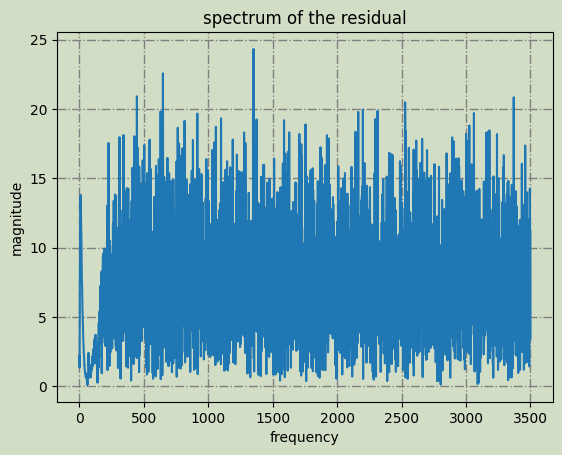

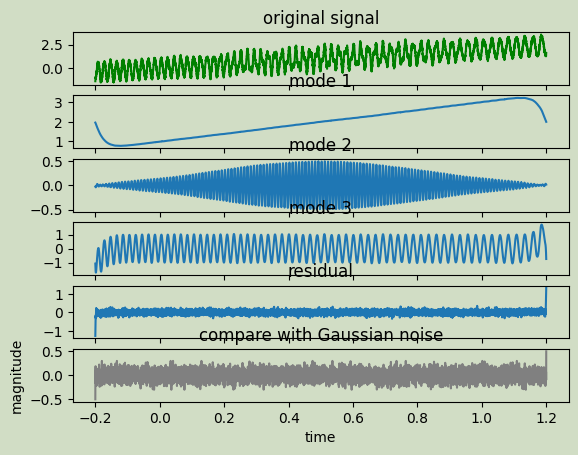

In [5]:
# Plot
plot(y_rfft, title='spectrum of the original signal', x_label='frequency', y_label='magnitude')
plot(res_rfft, title='spectrum of the residual', x_label='frequency', y_label='magnitude')
plot_modes_residual(Modes, res, y, t)